<div class="markdown-google-sans">
  <h1>欢迎使用 Colab！</h1>
</div>

<div class="markdown-google-sans">
  <h2>（新功能）试用 Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


如果您已经熟悉 Colab，请观看此视频，了解互动表格、已执行代码的历史记录视图和命令面板。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  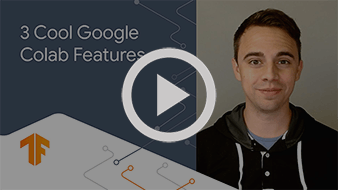
  </a>
</center>

<div class="markdown-google-sans">
  <h2>什么是 Colab？</h2>
</div>

借助 Colaboratory（简称 Colab），您可在浏览器中编写和执行 Python 代码，并且：
- 无需任何配置
- 免费使用 GPU
- 轻松共享

无论您是一名<strong>学生</strong>、<strong>数据科学家</strong>还是 <strong>AI 研究员</strong>，Colab 都能够帮助您更轻松地完成工作。您可以观看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 简介</a>了解详情，或查看下面的入门指南！

<div class="markdown-google-sans">

## 微调 bert-base-cased 模型(文本分类)
</div>

借助 Colab，您只需使用<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">几行代码</a>，即可导入图像数据集、用图像数据集训练图像分类器，以及评估模型。Colab 笔记本会在 Google 的云服务器中执行代码，也就是说，无论您所用机器的功能如何，您都可以利用 Google 硬件（包括 <a href="#using-accelerated-hardware">GPU 和 TPU</a>）的强大性能。只要有个浏览器即可。

In [4]:
from transformers import TrainingArguments

model_dir = "models/bert-base-cased"
training_args = TrainingArguments(
    num_train_epochs=3,
    per_device_train_batch_size=4,
    evaluation_strategy="epoch",
    output_dir="./output",
    logging_dir="./logs",
    logging_steps=10)

print(training_args)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=epoch,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
f

In [1]:
!pip install evaluate

In [3]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(output_dir="./output_dir",
                                  evaluation_strategy="epoch",
                                  logging_dir="./log",
                                  logging_steps=10
                                  )


In [3]:
!pip install evaluate datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.2 MB/s eta 0:00:00


In [6]:
from transformers import Trainer, AutoModelForSequenceClassification, TrainingArguments, AutoTokenizer
from datasets import load_dataset
import numpy as np
import evaluate

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased",num_labels=5)
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    num_train_epochs=3,
    per_device_train_batch_size=4,
    evaluation_strategy="epoch",
    output_dir="./output",
    logging_dir="./logs",
    logging_steps=10)

dataset = load_dataset("yelp_review_full")

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
def tokenize_function(examples):
    # padding: 填充
    # truncation: 截断
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_dataset = dataset["train"].shuffle(seed=42).select(range(1000)).map(tokenize_function, batched=True)
test_dataset = dataset["test"].shuffle(seed=42).select(range(1000)).map(tokenize_function, batched=True)

#tokenized_datasets = dataset.map(tokenize_function, batched=True)
#train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
#test_dataset = tokenized_datasets["test"].shuffle(seed=42).s(range(1000))


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,1.612700,1.609697,0.205000
2,1.624700,1.605740,0.220000
3,1.604900,1.607115,0.220000


TrainOutput(global_step=750, training_loss=1.637682893117269, metrics={'train_runtime': 403.1503, 'train_samples_per_second': 7.441, 'train_steps_per_second': 1.86, 'total_flos': 789354427392000.0, 'train_loss': 1.637682893117269, 'epoch': 3.0})

In [7]:
trainer.evaluate(test_dataset)

{'eval_loss': 1.6071149110794067,
 'eval_accuracy': 0.22,
 'eval_runtime': 30.093,
 'eval_samples_per_second': 33.23,
 'eval_steps_per_second': 4.154,
 'epoch': 3.0}

In [9]:
trainer.save_model("./fine-model")

In [31]:
trainer.save_state()

# 微调 distilbert-base-uncased 模型(QA 任务)

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
    

In [4]:
from datasets import load_dataset

squad_v2 = True

datasets = load_dataset("squad_v2" if squad_v2 else "squad")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [16]:
datasets["train"][0]

{'id': '56be85543aeaaa14008c9063',
 'title': 'Beyoncé',
 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'question': 'When did Beyonce start becoming popular?',
 'answers': {'text': ['in the late 1990s'], 'answer_start': [269]}}

In [20]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
  assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
  picks = []
  for _ in range(num_examples):
    pick = random.randint(0, len(dataset)-1)
    while pick in picks:
      pick = random.randint(0, len(dataset)-1)
    picks.append(pick)

  df = pd.DataFrame(dataset[picks])
  for column, typ in dataset.features.items():
    if isinstance(typ, ClassLabel):
      df[column] = df[column].transform(lambda i: typ.names[i])
    elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
      df[column] = df[column].transform(lambda x: [typ.feature.names[i] for i in x])
  display(HTML(df.to_html()))

show_random_elements(datasets["train"])

,id,title,context,question,answers
0,5727ebe03acd2414000deff0,Gamal_Abdel_Nasser,"Nasser remains an iconic figure in the Arab world, particularly for his strides towards social justice and Arab unity, modernization policies, and anti-imperialist efforts. His presidency also encouraged and coincided with an Egyptian cultural boom, and launched large industrial projects, including the Aswan Dam and Helwan City. Nasser's detractors criticize his authoritarianism, his government's human rights violations, his populist relationship with the citizenry, and his failure to establish civil institutions, blaming his legacy for future dictatorial governance in Egypt. Historians describe Nasser as a towering political figure of the Middle East in the 20th century.",What century did Nasser rule in?,"{'text': ['20th'], 'answer_start': [667]}"
1,56dff532231d4119001abf05,Pub,"In Ireland, pubs are known for their atmosphere or ""craic"". In Irish, a pub is referred to as teach tábhairne (""tavernhouse"") or teach óil (""drinkinghouse""). Live music, either sessions of traditional Irish music or varieties of modern popular music, is frequently featured in the pubs of Ireland. Pubs in Northern Ireland are largely identical to their counterparts in the Republic of Ireland except for the lack of spirit grocers. A side effect of ""The Troubles"" was that the lack of a tourist industry meant that a higher proportion of traditional bars have survived the wholesale refitting of Irish pub interiors in the 'English style' in the 1950s and 1960s. New Zealand sports a number of Irish pubs.",What country outside Ireland is known for having Irish pubs?,"{'text': ['New Zealand'], 'answer_start': [664]}"
2,56d61c4e1c85041400946f1d,2008_Sichuan_earthquake,"The Internet was extensively used for passing information to aid rescue and recovery efforts. For example, the official news agency Xinhua set up an online rescue request center in order to find the blind spots of disaster recovery. After knowing that rescue helicopters had trouble landing into the epicenter area in Wenchuan, a student proposed a landing spot online and it was chosen as the first touchdown place for the helicopters[not in citation given]. Volunteers also set up several websites to help store contact information for victims and evacuees. On May 31, a rescue helicopter carrying earthquake survivors and crew members crashed in fog and turbulence in Wenchuan county. No-one survived.",What kind of information were websites set up to store?,"{'text': ['contact information'], 'answer_start': [514]}"
3,572abec0be1ee31400cb8201,Friedrich_Hayek,"In Why F A Hayek is a Conservative, British policy analyst Madsen Pirie claims Hayek mistakes the nature of the conservative outlook. Conservatives, he says, are not averse to change – but like Hayek, they are highly averse to change being imposed on the social order by people in authority who think they know how to run things better. They wish to allow the market to function smoothly and give it the freedom to change and develop. It is an outlook, says Pirie, that Hayek and conservatives both share.",Pirie believes Hayek to be a conservative for what reason?,"{'text': ['mistakes the nature of the conservative outlook'], 'answer_start': [85]}"
4,5a36f18395360f001af1b36c,Gregorian_calendar,"To unambiguously specify the date, dual dating or Old Style (O.S.) and New Style (N.S.) are sometimes used with dates. Dual dating uses two consecutive years because of differences in the starting date of the year, or includes both the Julian and Gregorian dates. Old Style and New Style (N.S.) indicate either whether the start of the Julian year has been adjusted to start on 1 January (N.S.) even though documents written at the time use a different start of year (O.S.), or whether a date conforms to the Julian calendar (O.S.) rather than the Gregorian (N.S.).",Which system indicates that the date that the Julian date has been adjusted for length?,"{'text': [], 'answer_start'

In [5]:
from transformers import AutoTokenizer, PreTrainedTokenizerFast

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
assert isinstance(tokenizer, PreTrainedTokenizerFast)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [25]:
tokenizer("Hello, this one sentence!", "And this sentence goes with it.")

{'input_ids': [101, 7592, 1010, 2023, 2028, 6251, 999, 102, 1998, 2023, 6251, 3632, 2007, 2009, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [6]:
for i, example in enumerate(datasets["train"]):
  if len(tokenizer(example["question"], example["context"])["input_ids"]) > 384:
    print(i)
  break

In [43]:
len(tokenizer(example["question"], example["context"])["input_ids"])

174

In [46]:
max_length=160

len(tokenizer(example["question"], example["context"], max_length=max_length, truncation="only_second")["input_ids"])

160

In [50]:
token_example = tokenizer(example["question"],
                          example["context"],
                          max_length=max_length,
                          truncation="only_second",
                          return_overflowing_tokens=True,
                          stride=128
                          )
print(token_example.keys())

dict_keys(['input_ids', 'attention_mask', 'overflow_to_sample_mapping'])


In [52]:
[len(x) for x in token_example["input_ids"]]

[160, 152]

In [55]:
for x in token_example["input_ids"][:2]:
  print(tokenizer.decode(x))

[CLS] when did beyonce start becoming popular? [SEP] beyonce giselle knowles - carter ( / biːˈjɒnseɪ / bee - yon - say ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r & b girl - group destiny's child. managed by her father, mathew knowles, the group became one of the world's best - selling girl groups of all time. their hiatus saw the release of beyonce's debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number [SEP]
[CLS] when did beyonce start becoming popular? [SEP] ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in

In [64]:
token_example = tokenizer(example["question"],
                          example["context"],
                          max_length=max_length,
                          truncation="only_second",
                          return_overflowing_tokens=True,
                          return_offsets_mapping=True,
                          stride=128
                          )
print(token_example["offset_mapping"][0][:100])

[(0, 0), (0, 4), (5, 8), (9, 16), (17, 22), (23, 31), (32, 39), (39, 40), (0, 0), (0, 7), (8, 10), (10, 15), (16, 23), (23, 24), (24, 30), (31, 32), (32, 33), (33, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 42), (42, 43), (43, 44), (45, 48), (48, 49), (49, 51), (51, 52), (52, 53), (53, 56), (56, 57), (58, 59), (59, 63), (64, 73), (74, 75), (75, 76), (77, 81), (81, 82), (83, 85), (86, 88), (89, 97), (98, 104), (104, 105), (106, 116), (116, 117), (118, 124), (125, 133), (134, 137), (138, 145), (145, 146), (147, 151), (152, 155), (156, 162), (163, 165), (166, 173), (173, 174), (175, 180), (180, 181), (182, 185), (186, 195), (196, 198), (199, 206), (207, 214), (215, 218), (219, 226), (227, 239), (240, 242), (243, 244), (245, 250), (250, 251), (252, 255), (256, 260), (261, 263), (264, 268), (269, 271), (272, 275), (276, 280), (281, 286), (287, 289), (290, 294), (295, 301), (302, 304), (305, 306), (306, 307), (307, 308), (309, 313), (313, 314), (314, 319), (320, 327), (327, 328), (328

In [58]:
for x in token_example["input_ids"][:2]:
  print(tokenizer.decode(x))

[CLS] when did beyonce start becoming popular? [SEP] beyonce giselle knowles - carter ( / biːˈjɒnseɪ / bee - yon - say ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r & b girl - group destiny's child. managed by her father, mathew knowles, the group became one of the world's best - selling girl groups of all time. their hiatus saw the release of beyonce's debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number [SEP]
[CLS] when did beyonce start becoming popular? [SEP] ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in

In [65]:
pad_on_right = tokenizer.padding_side == "right"

In [9]:

doc_stride=128
max_length=384
pad_on_right = tokenizer.padding_side == "right"

def prepare_train_features(example):
  example["question"] = [q.strip() for q in example["question"]]

  tokenized_examples = tokenizer(
      example["question" if pad_on_right else "context"],
      example["context" if pad_on_right else "question"],
      truncation="only_second" if pad_on_right else "only_first",
      max_length=max_length,
      stride=doc_stride,
      return_overflowing_tokens=True,
      return_offsets_mapping=True,
      padding="max_length",
  )

  sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
  offset_mapping = tokenized_examples.pop("offset_mapping")

  tokenized_examples["start_positions"] = []
  tokenized_examples["end_positions"] = []

  for i, offsets in enumerate(offset_mapping):
    input_ids = tokenized_examples["input_ids"][i]
    cls_index = input_ids.index(tokenizer.cls_token_id)
    sequence_ids = tokenized_examples.sequence_ids(i)
    sample_index = sample_mapping[i]
    answers = example["answers"][sample_index]

    if len(answers["answer_start"]) == 0:
      tokenized_examples["start_positions"].append(cls_index)
      tokenized_examples["end_positions"].append(cls_index)
    else:
      start_char = answers["answer_start"][0]
      end_char = start_char + len(answers["text"][0])

      token_start_index = 0
      while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
        token_start_index += 1

      token_end_index = len(input_ids) - 1
      while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
        token_end_index -= 1

      if not (offsets[token_start_index][0] <= start_char and offsets[token_end_index][1] >= end_char):
        tokenized_examples["start_positions"].append(cls_index)
        tokenized_examples["end_positions"].append(cls_index)
      else:
        while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
          token_start_index += 1
        tokenized_examples["start_positions"].append(token_start_index - 1)
        while offsets[token_end_index][1] >= end_char:
          token_end_index -= 1
        tokenized_examples["end_positions"].append(token_end_index + 1)

  return tokenized_examples

In [10]:
tokenized_datasets = datasets.map(prepare_train_features, batched=True, remove_columns=datasets["train"].column_names)

Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [12]:
 from transformers import TrainingArguments

 batch_size = 16
 model_dir = "models"
 model_checkpoint = "distilbert-base-uncased"
 model_name = model_checkpoint.split("/")[-1]

 args = TrainingArguments(
     output_dir=f"{model_dir}/{model_name}-finetuned-squad",
     evaluation_strategy="epoch",
     save_strategy="epoch",
     learning_rate=2e-5,
     per_device_train_batch_size=batch_size,
     per_device_eval_batch_size=batch_size,
     num_train_epochs=3,
     weight_decay=0.01,
     push_to_hub=False,
 )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import default_data_collator

data_collator = default_data_collator

In [15]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [16]:
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [90]:
train_model_path = f"{model_dir}/{model_name}-finetuned-squad"
trainer.save_model(train_model_path)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [91]:
trained_model = AutoModelForQuestionAnswering.from_pretrained(train_model_path)

trained_model = Trainer(
    model=trained_model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory models/distilbert-base-uncased-finetuned-squad.

In [92]:
import torch

for batch in trainer.get_eval_dataloader():
  break
batch = {k: v.to(trainer.model.device) for k, v in batch.items()}

with torch.no_grad():
  output = trainer.model(**batch)

output.keys()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
n_best_size = 20
import numpy as np

start_logits = output.start_logits[0].cpu().numpy()
end_logits = output.end_logits[0].cpu().numpy()

start_indices = np.argsort(start_logits)[-1 : -n_best_size - 1 : -1].tolist()
end_indices = np.argsort(end_logits)[-1 : -n_best_size - 1 : -1].tolist()

valid_answers = []

for start_index in start_indices:
  for end_index in end_indices:
    if start_index <= end_index:
      valid_answers.append(
          {
              "score": start_logits[start_index] + end_logits[end_index],
              "text": tokenizer.decode(tokenized_example["input_ids"][start_index : end_index + 1])
          }
      )

In [ ]:
def prepare_validation_features(examples):
  examples["question"] = [q.strip() for q in examples["question"]]

  tokenized_examples = tokenizer(
      examples["question" if pad_on_right else "context"],
      examples["context" if pad_on_right else "question"],
      truncation="only_second" if pad_on_right else "only_first",
      max_length=max_length,
      stride=doc_stride,
      return_overflowing_tokens=True,
      return_offsets_mapping=True,
      padding="max_length",
  )

  sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

  tokenized_examples["example_id"] = []

  for i in range(len(tokenized_examples["input_ids"])):
    sequence_ids = tokenized_examples.sequence_ids(i)
    context_index = 1 if pad_on_right else 0
    sample_index = sample_mapping[i]
    tokenized_examples["example_id"].append(examples["id"][sample_index])
    tokenized_examples["offset_mapping"][i] = [
        (o if sequence_ids[k] == context_index else None)
        for k, o in enumerate(tokenized_examples["offset_mapping"][i])
    ]

In [ ]:
validation_features = datasets["validation"].map(
    prepare_validation_features,
    batched=True,
    remove_columns=datasets["validation"].column_names
)